In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Step 1. Memanggil Library yang dibutuhkan 

%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [5]:
data=pd.read_csv('dataset/Data-Jumlah-Kunjungan-Wisman-Ke-Indonesia-Berdasarkan-Pintu-Masuk-Tahun-2014.csv')
data.head()

,pintu_masuk,januari,februari,maret,april,mei,juni,juli,agustus,september,oktober,november,desember
0,Soekarno-Hatta,187123.0,180362.0,194720.0,180787.0,184534.0,208624.0,169135.0,218903.0,174169.0,177274.0,180208.0,190598.0
1,Ngurah Rai,278685.0,269367.0,268418.0,277925.0,285965.0,329654.0,358907.0,336628.0,352017.0,339200.0,293858.0,341111.0
2,Kualanamu Int'.,19029.0,17780.0,18493.0,15956.0,19781.0,19376.0,16579.0,16901.0,17792.0,20946.0,22848.0,29243.0
3,Batam,119054.0,97445.0,122019.0,111929.0,115323.0,140218.0,101966.0,111455.0,113090.0,126169.0,123505.0,171907.0
4,Sam Ratulangi,1694.0,1079.0,1340.0,1079.0,1365.0,1487.0,1652.0,1854.0,1652.0,1642.0,943.0,1492.0


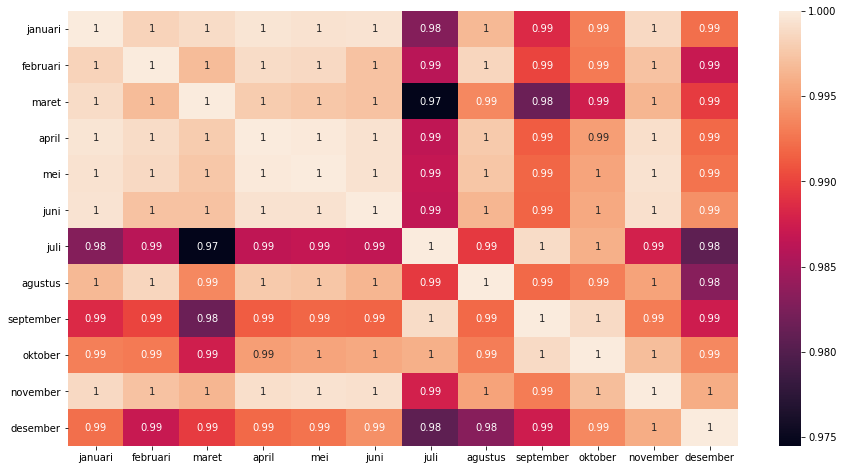

In [12]:
#Next step, we should choose numerical data first
plt.figure(figsize=(15,8))
sns.heatmap(data.drop(['pintu_masuk'],1).corr(),annot=True)

In [13]:
kering=['maret','april','mei','juni','juli','agustus','september']
hujan=['oktober','november','desember','januari','februari']
Kemarau=data[kering]
Hujan=data[hujan]

In [19]:
Kemarau_mean=Kemarau.mean(axis=1)
Hujan_mean=Hujan.mean(axis=1)


In [21]:
Kdata=pd.DataFrame()
Kdata['Kemarau']=Kemarau_mean
Kdata['Hujan']=Hujan_mean
Kdata.head()

,Kemarau,Hujan
0,190124.571429,183113.0
1,315644.857143,304444.2
2,17839.714286,21969.2
3,116571.428571,127616.0
4,1489.857143,1370.0


In [22]:
# Konversi Dataset ke Data Array 
X = np.asarray(Kdata)

Text(0.5,1,'Grafik Konsumen')

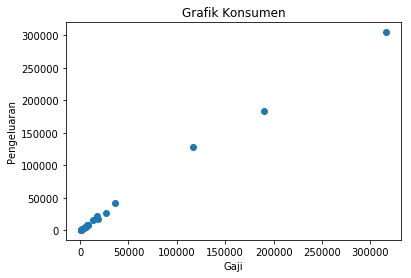

In [107]:
## Step 4. Menampilkan data ke dalam grafik scatterplot 
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik Konsumen")

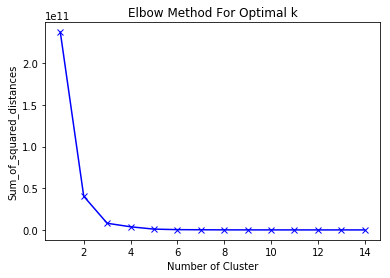

In [26]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Cluster')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [27]:
# Step 5. Melakukan aktivasi algoritma K-Means 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
print(kmeans.cluster_centers_)

[[  9535.19327731  10216.95294118]
 [315644.85714286 304444.2       ]
 [153348.         155364.5       ]]


In [29]:
print(kmeans.labels_)

[2 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


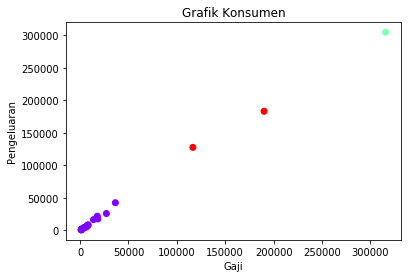

In [30]:
# Step 7 Visualisasi Hasil 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik Konsumen")
plt.show()

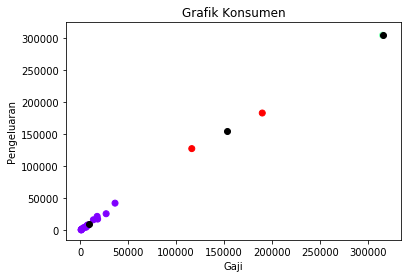

In [31]:
# Step 8 Menampilkan hasil centroid 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik Konsumen")
plt.show()

In [32]:
# Memasukkan hasil label ke dalam suatu 
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('cluster')
data_clustered

,0,1,cluster
9,5434.714286,5379.6,0
17,27205.142857,26085.0,0
16,13888.428571,16634.6,0
15,7235.142857,7702.0,0
14,2033.428571,2629.6,0
13,1155.285714,1013.8,0
12,1254.000000,1387.0,0
11,6334.714286,5107.6,0
10,8309.000000,7901.8,0
19,36490.714286,42598.2,0


In [35]:
np.mean(cluster0)

0           9535.193277
1          10216.952941
cluster        0.000000
dtype: float64

In [37]:
data_clustered=pd.concat([data['pintu_masuk'],data_clustered],1)
data_clustered.head()

,pintu_masuk,0,1,cluster
0,Soekarno-Hatta,190124.571429,183113.0,2
1,Ngurah Rai,315644.857143,304444.2,1
2,Kualanamu Int'.,17839.714286,21969.2,0
3,Batam,116571.428571,127616.0,2
4,Sam Ratulangi,1489.857143,1370.0,0


In [38]:
cluster0=data_clustered[data_clustered['cluster']==0]
cluster1=data_clustered[data_clustered['cluster']==1]
cluster2=data_clustered[data_clustered['cluster']==2]


In [42]:
cluster

,pintu_masuk,0,1,cluster
0,Soekarno-Hatta,190124.571429,183113.0,2
3,Batam,116571.428571,127616.0,2


In [65]:
a=pd.DataFrame(kmeans.cluster_centers_)
NEW=pd.DataFrame()
NEW['Kemarau']=a[0]
NEW['Hujan']=a[1]
NEW

,Kemarau,Hujan
0,9535.193277,10216.952941
1,315644.857143,304444.200000
2,153348.000000,155364.500000


In [66]:
cluster0_Kemarau_mean=np.mean(cluster0[cluster0.columns[1]])
cluster0_Hujan_mean=np.mean(cluster0[cluster0.columns[2]])
cluster0_Kemarau_mean
cluster0_Hujan_mean

10216.95294117647

In [67]:
cluster1_Kemarau_mean=np.mean(cluster1[cluster1.columns[1]])
cluster1_Hujan_mean=np.mean(cluster1[cluster1.columns[2]])
cluster1_Kemarau_mean
cluster1_Hujan_mean

304444.2

In [70]:
Cluster=[0,1,2]
NEW1=pd.DataFrame()
NEW1['Kemarau']=NEW['Kemarau']
NEW1['Hujan']=NEW['Hujan']
NEW1['Cluster']=Cluster
NEW1.head()



,Kemarau,Hujan,Cluster
0,9535.193277,10216.952941,0
1,315644.857143,304444.200000,1
2,153348.000000,155364.500000,2


In [79]:
Cluster=[0,1,2,0,1,2]
Musim=['Kemarau','Kemarau','Kemarau','Hujan','Hujan','Hujan']
Pengunjung=[9535,315644,153348,10216,304444,155364]
datas=pd.DataFrame()
datas['Musim']=Musim
datas['Pengunjung']=Pengunjung
datas['Cluster']=Cluster
datas



,Musim,Pengunjung,Cluster
0,Kemarau,9535,0
1,Kemarau,315644,1
2,Kemarau,153348,2
3,Hujan,10216,0
4,Hujan,304444,1
5,Hujan,155364,2


,Kemarau,Hujan,Cluster
0,9535.193277,10216.952941,0
1,315644.857143,304444.200000,1
2,153348.000000,155364.500000,2


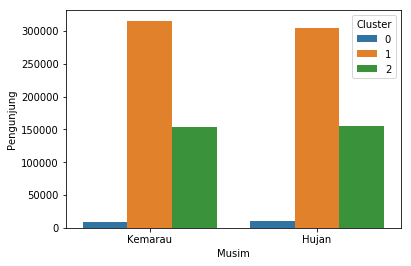

In [91]:
#Dmusim=datas[['Musim','Pengunjung']].groupby('Musim').mean

sns.barplot(y=datas['Pengunjung'],x=datas['Musim'], hue=datas['Cluster'])
NEW1

In [95]:
cluster0.sort_values()

,pintu_masuk,0,1,cluster
2,Kualanamu Int'.,17839.714286,21969.2,0
4,Sam Ratulangi,1489.857143,1370.0,0
5,Juanda,18348.857143,17750.2,0
6,Entikong,1731.142857,2069.2,0
7,Adi Sumarmo,1237.000000,850.4,0
8,Minangkabau,3963.142857,4490.8,0
9,Tanjung Priok,5434.714286,5379.6,0
10,Tanjung Pinang,8309.000000,7901.8,0
11,Bandara Int. Lombok,6334.714286,5107.6,0
12,Makasar,1254.000000,1387.0,0


In [134]:
# Step 5. Membentuk dendogram dengan metode ward 
#dendrogram = sch.dendrogram(sch.linkage(Kdata, method='ward'),orientation='right',labels=Kdata,index)

In [135]:
import plotly.figure_factory as ff

import numpy as np

#X = np.random.rand(10, 12)
fig = ff.create_dendrogram(X, orientation='left', labels=Kdata.index)
fig.update_layout(width=800, height=600)
fig.show()

In [119]:
cluster0

,pintu_masuk,0,1,cluster
2,Kualanamu Int'.,17839.714286,21969.2,0
4,Sam Ratulangi,1489.857143,1370.0,0
5,Juanda,18348.857143,17750.2,0
6,Entikong,1731.142857,2069.2,0
7,Adi Sumarmo,1237.000000,850.4,0
8,Minangkabau,3963.142857,4490.8,0
9,Tanjung Priok,5434.714286,5379.6,0
10,Tanjung Pinang,8309.000000,7901.8,0
11,Bandara Int. Lombok,6334.714286,5107.6,0
12,Makasar,1254.000000,1387.0,0


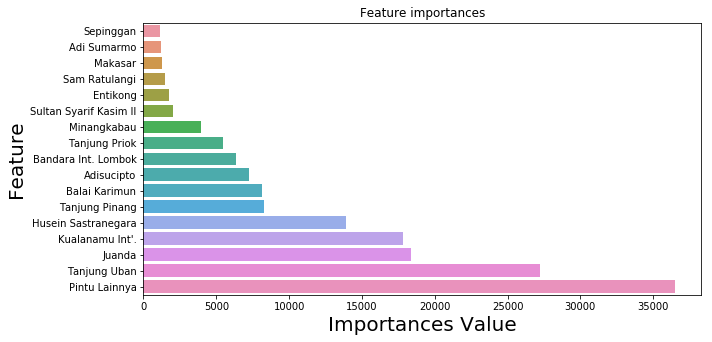

In [141]:
plt.figure(1, figsize=(10, 5))
plt.title("Feature importances")
ax = sns.barplot(x=cluster0.columns[1],y='pintu_masuk',data=cluster0.sort_values(cluster0.columns[1]))
plt.xlabel('Importances Value', fontsize = 20)
plt.ylabel('Feature', fontsize = 20)
plt.show()

## DBSCAN

In [150]:
from sklearn.cluster import DBSCAN
from sklearn import datasets

In [154]:
# Step 3. Konversi Dataset ke Data Array 
X = np.asarray(data.drop('pintu_masuk',1))
X

array([[187123., 180362., 194720., 180787., 184534., 208624., 169135.,
        218903., 174169., 177274., 180208., 190598.],
       [278685., 269367., 268418., 277925., 285965., 329654., 358907.,
        336628., 352017., 339200., 293858., 341111.],
       [ 19029.,  17780.,  18493.,  15956.,  19781.,  19376.,  16579.,
         16901.,  17792.,  20946.,  22848.,  29243.],
       [119054.,  97445., 122019., 111929., 115323., 140218., 101966.,
        111455., 113090., 126169., 123505., 171907.],
       [  1694.,   1079.,   1340.,   1079.,   1365.,   1487.,   1652.,
          1854.,   1652.,   1642.,    943.,   1492.],
       [ 16870.,  16476.,  18776.,  19145.,  20299.,  18685.,  16174.,
         18239.,  17124.,  17997.,  18324.,  19084.],
       [  1535.,   1609.,   1699.,   1430.,   1785.,   1703.,   2488.,
          1568.,   1445.,   1731.,   1936.,   3535.],
       [   774.,    803.,   1114.,   1029.,   1692.,   1042.,   1125.,
          1399.,   1258.,   1122.,    853.,    700.],


Text(0,0.5,'Sepal Width')

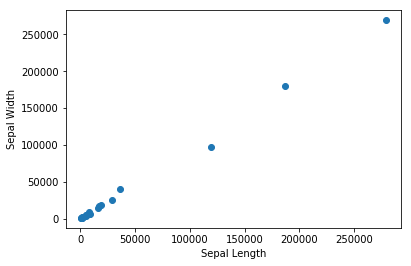

In [155]:
## Step 4. Menampilkan data ke dalam grafik scatterplot 
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

In [156]:
# Step 5. Melakukan aktivasi algoritma DBSCAN
dbscan = DBSCAN(eps=50000)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=50000, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [157]:
# Step 6. Menampilkan label dibangkitkan oleh algoritma dbscan 
print(dbscan.labels_)

[-1 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


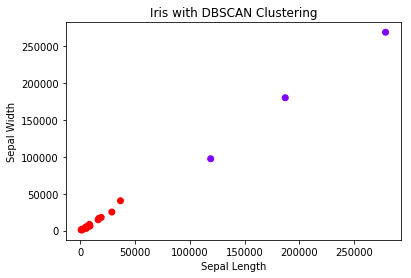

In [158]:
# Step 7 Visualisasi Hasil 
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris with DBSCAN Clustering")
plt.show()